In [1]:
import torch
from detecto import core, utils, visualize
from torchvision import transforms
from detecto import core, utils, visualize

import matplotlib.pyplot as plt


In [2]:
torch.cuda.is_available()

True

In [1]:
dir = os.path.dirname
src_path = dir(os.path.abspath(''))
print(src_path)

c:\Users\Mary\Desktop\BootCamp\Python\MaryC-MezaR\data_science_bootcamp_2021\Machine_Learning_project


In [2]:
path_images = src_path + os.sep + "data" +  os.sep + "object_detection"  +  os.sep + "train"  +  os.sep
print(path_images)

c:\Users\Mary\Desktop\BootCamp\Python\MaryC-MezaR\data_science_bootcamp_2021\Machine_Learning_project\data\object_detection\train\


In [4]:
#labels = ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic']

In [6]:
## MODELO BASE
dataset = core.Dataset(path_images)
model = core.Model(['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic'])

model.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset
  0%|          | 0/471 [00:00<?, ?it/s]C:\Users\Mati\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 471/471 [03:32<00:00,  2.21it/s]
Epoch 2 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:30<00:00,  2.23it/s]
Epoch 3 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:30<00:00,  2.24it/s]
Epoch 4 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:31<00:00,  2.23it/s]
Epoch 5 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:30<00:00,  2.24it/s]
Epoch 6 of 10
Begin i

In [5]:

path_test = src_path + os.sep + "data" +  os.sep + "object_detection"  +  os.sep + "validation"  +  os.sep

In [8]:
# Specify the path to your image
image = utils.read_image(path_test + "000003.JPG")
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions


print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

['plastic', 'metal', 'plastic']
tensor([[1328.8680, 1376.7626, 1607.5018, 1666.7903],
        [1323.6946, 1378.5640, 1587.4930, 1683.6431],
        [1187.4454, 1282.7361, 1615.0735, 1660.3232]])
tensor([0.7866, 0.4299, 0.1608])


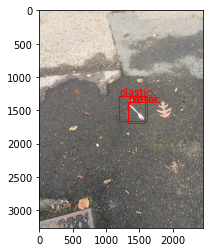

In [9]:
visualize.show_labeled_image(image, boxes, labels)

In [10]:
image = utils.read_image(path_test + "7043.JPG")
predictions = model.predict(image)
labels, boxes, scores = predictions
print(labels) 

print(boxes)

print(scores)

['plastic', 'paper', 'cardboard', 'plastic', 'cardboard', 'paper', 'plastic']
tensor([[1713.3065, 1850.1339, 2417.1399, 2231.7251],
        [ 312.1658, 1668.0605, 3008.2849, 3762.3179],
        [ 672.8470, 1761.1520, 2388.9285, 2829.9453],
        [ 665.1958, 1821.8348, 2389.2129, 2975.2810],
        [ 334.1764, 1601.2319, 2944.4343, 3687.4534],
        [ 722.6949, 1834.4663, 2418.3677, 2835.0383],
        [ 306.0825, 1738.1212, 2851.6624, 3596.9451]])
tensor([0.4425, 0.1830, 0.1771, 0.1371, 0.1309, 0.1104, 0.0964])


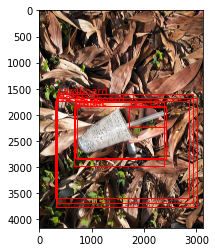

In [11]:
visualize.show_labeled_image(image, boxes, labels)

In [ ]:
## save base line

In [6]:
path_save = src_path + os.sep + "models" +  os.sep  

In [14]:
model.save(path_save + 'model1_baseline.pth')

# ... Later ...



In [7]:
model_2 = core.Model.load(path_save +'model1_baseline.pth', ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic'])

In [8]:
from torchvision import transforms

augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset(path_images, transform=augmentations)

loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

In [10]:
model_2.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset
  0%|          | 0/471 [00:00<?, ?it/s]C:\Users\Mati\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 471/471 [03:42<00:00,  2.12it/s]
Epoch 2 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:41<00:00,  2.12it/s]
Epoch 3 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:42<00:00,  2.12it/s]
Epoch 4 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:40<00:00,  2.14it/s]
Epoch 5 of 10
Begin iterating over training dataset
100%|██████████| 471/471 [03:41<00:00,  2.12it/s]
Epoch 6 of 10
Begin i

In [16]:
model_2.save(path_save + 'model_2_data_aug.pth')

In [5]:
path_save = src_path + os.sep + "models" +  os.sep  

In [11]:
image = utils.read_image(path_test + "6000.JPG")
predictions = model_2.predict(image)
labels, boxes, scores = predictions
print(labels) 

print(boxes)

print(scores)

['plastic', 'paper']
tensor([[ 385.8957,    8.6846, 1986.3595, 1913.7234],
        [ 363.1918,  167.9772, 2229.2190, 2163.2876]])
tensor([0.6763, 0.2062])


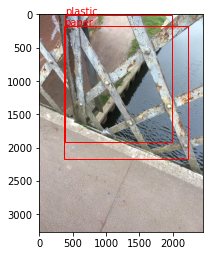

In [12]:
visualize.show_labeled_image(image, boxes, labels)

In [14]:
image = utils.read_image(path_test + "6043.JPG")
predictions = model_2.predict(image)
labels, boxes, scores = predictions
print(labels) 

print(boxes)

print(scores)

['biological', 'metal', 'glass', 'plastic']
tensor([[ 87.3494,  42.0833, 366.8181, 277.4566],
        [ 76.0020,  32.0942, 388.8648, 297.6140],
        [ 73.5819,  18.0946, 377.5649, 312.6691],
        [ 86.9796,  27.0830, 380.1601, 283.8755]])
tensor([0.6146, 0.5603, 0.2334, 0.1314])


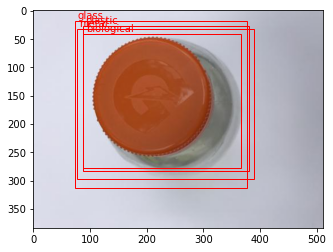

In [15]:
visualize.show_labeled_image(image, boxes, labels)

In [6]:
model_2 = core.Model.load(path_save +'model_2_data_aug.pth', ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic'])

In [25]:
path_test = src_path + os.sep + "object_detection_2" +  os.sep  + "validation"  +  os.sep 

Epoch 1 of 10
Begin iterating over training dataset
100%|██████████| 236/236 [03:42<00:00,  1.06it/s]
Begin iterating over validation dataset
100%|██████████| 239/239 [01:12<00:00,  3.29it/s]
Loss: 0.30441016546415484
Epoch 2 of 10
Begin iterating over training dataset
100%|██████████| 236/236 [03:41<00:00,  1.07it/s]
Begin iterating over validation dataset
100%|██████████| 239/239 [01:12<00:00,  3.30it/s]
Loss: 0.29753002000653095
Epoch 3 of 10
Begin iterating over training dataset
100%|██████████| 236/236 [03:39<00:00,  1.08it/s]
Begin iterating over validation dataset
100%|██████████| 239/239 [01:12<00:00,  3.30it/s]
Loss: 0.2974255275464457
Epoch 4 of 10
Begin iterating over training dataset
100%|██████████| 236/236 [03:41<00:00,  1.06it/s]
Begin iterating over validation dataset
100%|██████████| 239/239 [01:12<00:00,  3.28it/s]
Loss: 0.3049908641289343
Epoch 5 of 10
Begin iterating over training dataset
100%|██████████| 236/236 [03:42<00:00,  1.06it/s]
Begin iterating over validat

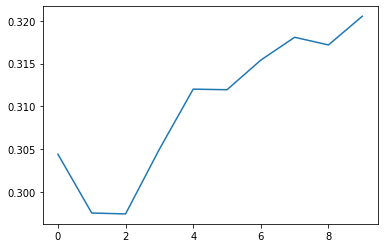

In [18]:

val_dataset = core.Dataset(path_test)

losses = model_2.fit(loader, val_dataset, epochs=10, learning_rate=0.001, 
                   lr_step_size=5, verbose=True)
                   
plt.plot(losses)
plt.show()

In [ ]:
## visualización en video

In [63]:
path_video = src_path + os.sep + "resources" +  os.sep  + "video4.mp4" 
path_video_output = src_path + os.sep + "reports" +  os.sep  + 'output3.avi'

In [60]:
from detecto.core import Model
from detecto.visualize import detect_video

In [ ]:
### La función que proponen no está correcta, y se la ha revisado y corregido para poder exportar videos 

In [54]:
detect_video(model_2, path_video, path_video_output)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [61]:
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch

from detecto.utils import reverse_normalize, normalize_transform, _is_iterable
from torchvision import transforms

def detect_video(model, input_file, output_file, fps=30, score_filter=0.6):
    
    video = cv2.VideoCapture(input_file)

    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    scaled_size = 800
    scale_down_factor = min(frame_height, frame_width) / scaled_size

    out = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame_width, frame_height))

    transform_frame = transforms.Compose([  
        transforms.ToPILImage(),
        transforms.Resize(scaled_size),
        transforms.ToTensor(),
        normalize_transform(),
    ])

    while True:
        ret, frame = video.read()
        if not ret:
            break

        transformed_frame = frame  
        predictions = model.predict(transformed_frame)

        for label, box, score in zip(*predictions):
            if score < score_filter:
                continue

           
            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 3)

           
            cv2.putText(frame, '{}: {}'.format(label, round(score.item(), 2)), (int(box[0]), int(box[1]) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

        
        out.write(frame)


        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break


    video.release()
    out.release()


    cv2.destroyAllWindows()


In [64]:
detect_video(model_2, path_video, path_video_output)